In [6]:
# Imports
from IPython.display import display
from PIL import Image
from transformers import AutoModelForImageClassification, AutoImageProcessor

import os
import torch
torch.device('cpu')

device(type='cpu')

In [2]:
# Specify the path to your model directory
model_path = "model/"

# Load the model - Note download `model/tf_mode.h5` at https://huggingface.co/aalonso-developer/vit-base-patch16-224-in21k-clothing-classifier/tree/main
model = AutoModelForImageClassification.from_pretrained(
    model_path,
    from_tf=True,  # Indicates that the model weights are in TensorFlow format
    config="config.json"  # Provide the path to the config.json file
)
id2label = model.config.id2label

# Load the image processor
processor = AutoImageProcessor.from_pretrained(
    model_path,
    preprocess_config="preprocess_config.json"  # Provide the path to preprocess_config.json
)


All TF 2.0 model weights were used when initializing ViTForImageClassification.

All the weights of ViTForImageClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use ViTForImageClassification for predictions without further training.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [14]:
# Get clothing classification
def classify(image_path):
    # Process image
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt", format="channels_first")

    # Perform inference using the loaded model
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1).detach()
    topk = torch.topk(probs, 3)

    # Readable format
    clothing_embedding = [id2label[int(idx)] for idx in topk.indices[0]]
    clothing_probs = topk.values

    display(image.resize((200, 200)))
    print(clothing_embedding, '\n', clothing_probs)
    return clothing_embedding, clothing_probs

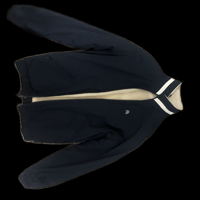

['Jacket', 'Cardigan', 'Blazer'] 
 tensor([[0.4023, 0.1822, 0.1779]])


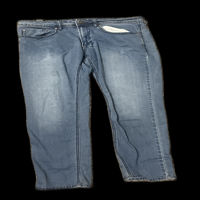

['Jeans', 'Sweatpants', 'Blazer'] 
 tensor([[0.9627, 0.0047, 0.0035]])


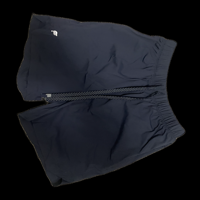

['Shorts', 'Sweatpants', 'Blazer'] 
 tensor([[0.9168, 0.0120, 0.0077]])


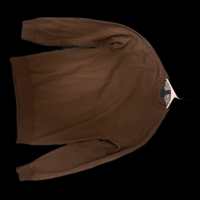

['Sweatpants', 'Top', 'Jeans'] 
 tensor([[0.2483, 0.1858, 0.1070]])


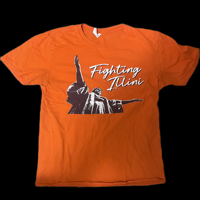

['Tee', 'Top', 'Jacket'] 
 tensor([[0.9468, 0.0093, 0.0055]])


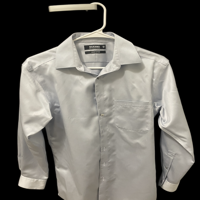

['Jacket', 'Blazer', 'Tee'] 
 tensor([[0.9017, 0.0400, 0.0088]])


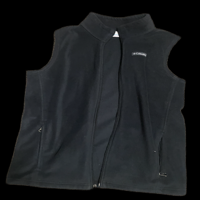

['Tank', 'Top', 'Jacket'] 
 tensor([[0.4623, 0.1686, 0.0808]])


In [16]:
# Loop through all images
input_path = "../data/no_background_images"
for filename in sorted(os.listdir(input_path)):
    if filename.endswith(".png") or image_path.endswith(".jpg"):
        image_path = os.path.join(input_path, filename)
        classify(image_path)